In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Аналитик_обучение/restaurants_7_задание.csv')

In [13]:
df

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000
...,...,...,...,...,...,...,...,...
6588,Shree Rathnam,"Wave Mall,BRS Nagar, West Ludhiana",West Ludhiana,Ludhiana,South Indian,4.1,20,600
6589,Cafe Delish,"Radisson Blu,Rajguru Nagar, West Ludhiana",West Ludhiana,Ludhiana,"Multi-Cuisine, North Indian, Continental, A...",4.4,48,3100
6590,3 K Resorts,"BRS Nagar, West Ludhiana",West Ludhiana,Ludhiana,North Indian,1.0,1,1100
6591,Dovka Bar,"Nirvana Hotel Banquets Club,PAU, Central Ludhiana",Central Ludhiana,Ludhiana,"North Indian, Chinese, Finger Food",4.3,3,1500


In [99]:
# Создание групп по стоимости
df['Cost_Group'] = pd.cut(
    df['Cost'],
    bins=[0, 2000, 4000, float('inf')],  # Диапазоны: (0-2000], (2000-4000], (4000+]
    labels=['Минимальная', 'Средняя', 'Высокая']  # Названия групп
)

# Удаление строк с пропущенными значениями в ключевых столбцах
df = df.dropna(subset=['Rating', 'Votes', 'Cost'])

# Вычисление корреляции внутри каждой группы
correlation_results = {}

for group in df['Cost_Group'].unique():
    group_data = df[df['Cost_Group'] == group]  # Фильтрация данных для текущей группы

    # Проверяем, есть ли достаточно данных в группе (минимум 2 строки)
    if len(group_data) < 2:
        print(f"Группа '{group}' содержит недостаточно данных для вычисления корреляции, пропускаем...")
        continue

    correlation = group_data[['Rating', 'Votes', 'Cost']].corr()  # Вычисление корреляции
    correlation_results[group] = correlation['Rating']  # Сохраняем корреляцию с рейтингом

# Вывод результатов
print("Корреляция признаков с рейтингом в каждой группе по стоимости:")
for group, correlation in correlation_results.items():
    print(f"\nГруппа: {group}")
    print(correlation)

Корреляция признаков с рейтингом в каждой группе по стоимости:

Группа: Минимальная
Rating    1.000000
Votes     0.091628
Cost      0.138770
Name: Rating, dtype: float64

Группа: Средняя
Rating    1.000000
Votes     0.026913
Cost      0.138784
Name: Rating, dtype: float64

Группа: Высокая
Rating    1.000000
Votes     0.272503
Cost      0.173744
Name: Rating, dtype: float64


In [6]:
# Проверка наличия пропусков
print(df.isnull().sum())

Name        0
Location    0
Locality    0
City        0
Cuisine     0
Rating      0
Votes       0
Cost        0
dtype: int64


In [8]:
# Преобразование типов
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Cost'] = pd.to_numeric(df['Cost'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

          Rating     Votes      Cost
Rating  1.000000  0.094213  0.149745
Votes   0.094213  1.000000  0.311000
Cost    0.149745  0.311000  1.000000


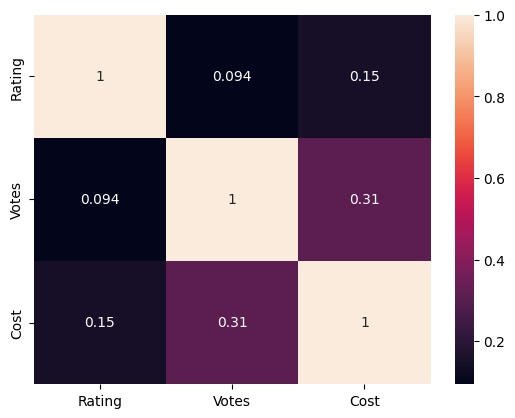

In [40]:
corr_matrix = df[['Rating', 'Votes', 'Cost']].corr()
print(corr_matrix)
# Визуализация корреляций
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [64]:
# Анализ влияния типа кухни на рейтинг
all_cuisines = df['Cuisine'].dropna().apply(lambda x: [c.strip() for c in x.split(',')])
unique_cuisines = set(cuisine for sublist in all_cuisines for cuisine in sublist)

# Группировка по типу кухни и вычисление корреляций
cuisine_ratings = {}
for cuisine in unique_cuisines:
    group = df[df['Cuisine'].str.contains(cuisine, na=False)]
    corr = group[['Rating', 'Votes', 'Cost']].corr()
    cuisine_ratings[cuisine] = corr['Rating']

# Сохранение результатов в DataFrame
cuisine_corr_df = pd.DataFrame(cuisine_ratings).T
cuisine_corr_df.columns = ['Rating_vs_Rating', 'Votes_vs_Rating', 'Cost_vs_Rating']
print("Корреляции по типу кухни:\n", cuisine_corr_df)


Корреляции по типу кухни:
                 Rating_vs_Rating  Votes_vs_Rating  Cost_vs_Rating
Thai                         1.0         0.095504        0.249836
Malaysian                    1.0         0.637214        0.426005
Persian                      1.0         1.000000       -1.000000
Bengali                      1.0         0.191889        0.205356
Middle Eastern               1.0        -0.435717       -0.710975
...                          ...              ...             ...
Desserts                     1.0         0.126919        0.137434
Spanish                      1.0         0.809014        0.461529
Barbecue                     1.0         0.147925        0.086974
Drinks                       1.0         0.225637        0.357303
Hyderabadi                   1.0        -0.068154        0.278563

[96 rows x 3 columns]


In [65]:
# Анализ влияния локации на рейтинг
all_localities = df['Locality'].dropna().apply(lambda x: [loc.strip() for loc in x.split(',')])
unique_localities = set(loc for sublist in all_localities for loc in sublist)

# Группировка по локации и вычисление корреляций
locality_ratings = {}
for locality in unique_localities:
    group = df[df['Locality'].str.contains(locality, na=False)]
    corr = group[['Rating', 'Votes', 'Cost']].corr()
    locality_ratings[locality] = corr['Rating']

# Сохранение результатов в DataFrame
locality_corr_df = pd.DataFrame(locality_ratings).T
locality_corr_df.columns = ['Rating_vs_Rating', 'Votes_vs_Rating', 'Cost_vs_Rating']
print("Корреляции по локациям:\n", locality_corr_df)

Корреляции по локациям:
                   Rating_vs_Rating  Votes_vs_Rating  Cost_vs_Rating
Powai                          1.0        -0.048487        0.058970
West Agra                      1.0        -0.707772       -0.585366
East Nagpur                    1.0         0.094013       -0.403411
Dombivali                      1.0         0.599941        0.046074
Secunderabad                   1.0         0.101849        0.062176
...                            ...              ...             ...
West Nagpur                    1.0         0.281821        0.103076
West Chennai                   1.0         0.099154        0.101680
Central Vadodara               1.0         0.078117       -0.008510
Panchkula                      1.0         0.279033        0.069731
South Jaipur                   1.0         0.148045       -0.101319

[108 rows x 3 columns]


In [18]:
# Выбираем признаки
X = df[['Votes', 'Cost']]
y = df['Rating']

# Делим на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

# Вычисляем RMSE вручную
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print("R^2:", r2_score(y_test, y_pred))
print("Коэффициенты регрессии:", dict(zip(X.columns, model.coef_)))

# Анализ влияния признаков
for feat, coef in zip(X.columns, model.coef_):
    print(f"Влияние {feat} на рейтинг: коэффициент = {coef}")

RMSE: 0.6703679127850948
R^2: 0.025997283165978713
Коэффициенты регрессии: {'Votes': np.float64(0.00014605333300379733), 'Cost': np.float64(0.00012165281216706133)}
Влияние Votes на рейтинг: коэффициент = 0.00014605333300379733
Влияние Cost на рейтинг: коэффициент = 0.00012165281216706133


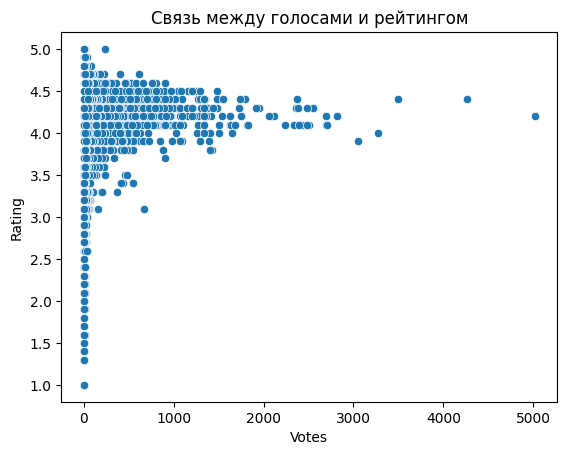

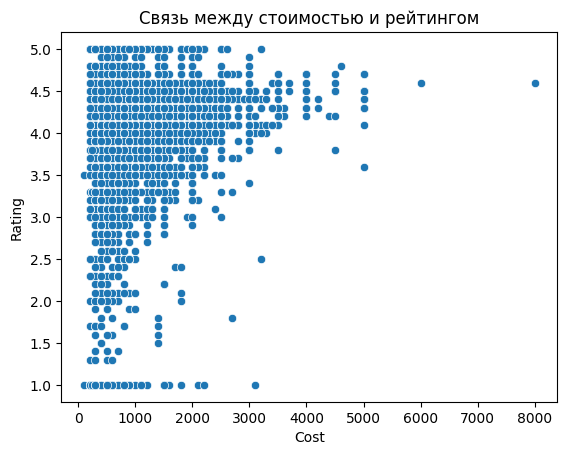

In [57]:
# Диаграмма рассеяния: Votes vs Rating
sns.scatterplot(data=df, x='Votes', y='Rating')
plt.title("Связь между голосами и рейтингом")
plt.show()

# Диаграмма рассеяния: Cost vs Rating
sns.scatterplot(data=df, x='Cost', y='Rating')
plt.title("Связь между стоимостью и рейтингом")
plt.show()

Коэффициент регрессии: 0.000146.
Увеличение количества голосов на 1000 приводит к росту рейтинга всего на 0.146.
Это указывает на очень слабую связь между количеством голосов и рейтингом. Хотя популярность ресторана (в виде голосов) оказывает влияние, оно не является значительным.

Коэффициент регрессии: 0.000122.
Увеличение стоимости на 1000 приводит к росту рейтинга всего на 0.122.
Это также указывает на очень слабую связь между стоимостью и рейтингом. Более дорогие рестораны не гарантируют более высокие оценки.

RMSE: 0.670 — средняя ошибка предсказания модели, что указывает на значительное отклонение предсказаний от реальных значений.
R²: 0.026 — модель объясняет лишь 2.6% вариации рейтинга, что говорит о слабой предсказательной способности.